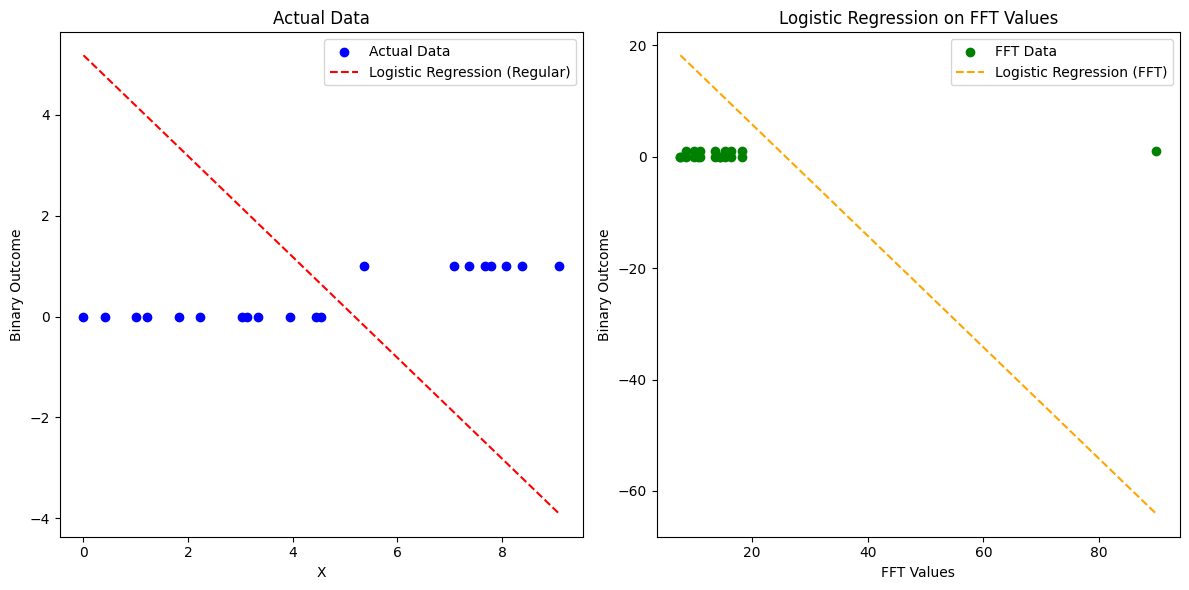

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.fftpack import fft

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = (X + np.random.normal(0, 1, size=len(X))) > 5  # Binary classification task

# Reshape X to a 2D array
X = X.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without FFT
logistic_model_regular = LogisticRegression()
logistic_model_regular.fit(X_train, y_train)

# Make predictions without FFT
y_pred_regular = logistic_model_regular.predict(X_test)

# Apply FFT to X_train and X_test
fft_values_train = np.abs(fft(X_train.flatten()))
fft_values_test = np.abs(fft(X_test.flatten()))

# Use only the real parts of the FFT coefficients
fft_values_train = np.real(fft_values_train)
fft_values_test = np.real(fft_values_test)

# Reshape FFT values to a 2D array
fft_values_train = fft_values_train.reshape(-1, 1)
fft_values_test = fft_values_test.reshape(-1, 1)

# Logistic Regression with FFT
logistic_model_fft = LogisticRegression()
logistic_model_fft.fit(fft_values_train, y_train)

# Make predictions with FFT
y_pred_fft = logistic_model_fft.predict(fft_values_test)

# Visualize the results
plt.figure(figsize=(12, 6))

# Plotting the actual data
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.xlabel('X')
plt.ylabel('Binary Outcome')
plt.title('Actual Data')

# Plotting the logistic regression decision boundary without FFT
X_range = np.linspace(min(X_test), max(X_test), 300).reshape(-1, 1)
boundary_regular = - (logistic_model_regular.coef_[0] * X_range + logistic_model_regular.intercept_) / logistic_model_regular.coef_[0]
plt.plot(X_range, boundary_regular, color='red', linestyle='dashed', label='Logistic Regression (Regular)')

plt.legend()

# Plotting the logistic regression decision boundary with FFT
plt.subplot(1, 2, 2)
plt.scatter(fft_values_test, y_test, color='green', label='FFT Data')
plt.xlabel('FFT Values')
plt.ylabel('Binary Outcome')
plt.title('Logistic Regression on FFT Values')

X_range_fft = np.linspace(min(fft_values_test), max(fft_values_test), 300).reshape(-1, 1)
boundary_fft = - (logistic_model_fft.coef_[0] * X_range_fft + logistic_model_fft.intercept_) / logistic_model_fft.coef_[0]
plt.plot(X_range_fft, boundary_fft, color='orange', linestyle='dashed', label='Logistic Regression (FFT)')

plt.legend()

plt.tight_layout()
plt.show()
